# EDA & Data visualization

## Imports

In [1]:
from src.Utils import *

In [2]:
# Importing the complete dataset
df = pq.read_pandas(source=f"assets/parquet/ALL.parquet").to_pandas()

In [3]:
# Importing each dataset as pandas DataFrame

# Hashmap of train datasets for each asset id
df_dict = {asset_id: None for asset_id in Utils.ASSET_IDS}

# Looping on each asset_id
for i in Utils.ASSET_IDS:
    asset_file = f"assets/parquet/{i}.parquet"
    df_dict[i] = pq.read_pandas(source=asset_file).to_pandas()

In [4]:
df_dict[Utils.get_asset_id("Bitcoin")].head(2)

,Count,Open,High,Low,Close,Volume,VWAP
timestamp,,,,,,,
2018-01-01 00:01:00,229,13835.194,14013.8,13666.11,13850.176,31.550062,13827.062093
2018-01-01 00:02:00,235,13835.036,14052.3,13680.00,13828.102,31.046432,13840.362591


## Data-visualization

### on complete `DataFrame`

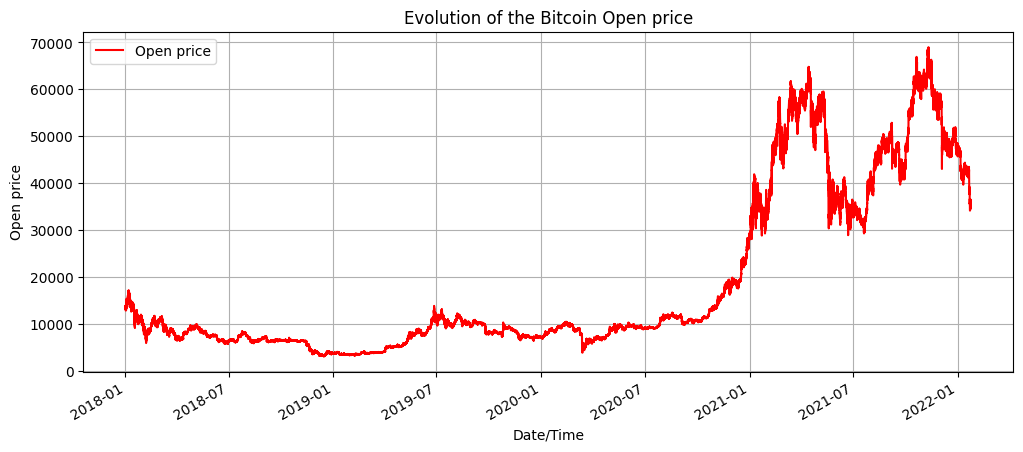

In [5]:
# Displaying a random dataframe (train)
_ = df_dict[Utils.get_asset_id("Bitcoin")]["Open"].plot(label="Open price", color="red")
_ = plt.grid()
_ = plt.title("Evolution of the Bitcoin Open price")
_ = plt.legend()
_ = plt.xlabel("Date/Time")
_ = plt.ylabel("Open price")

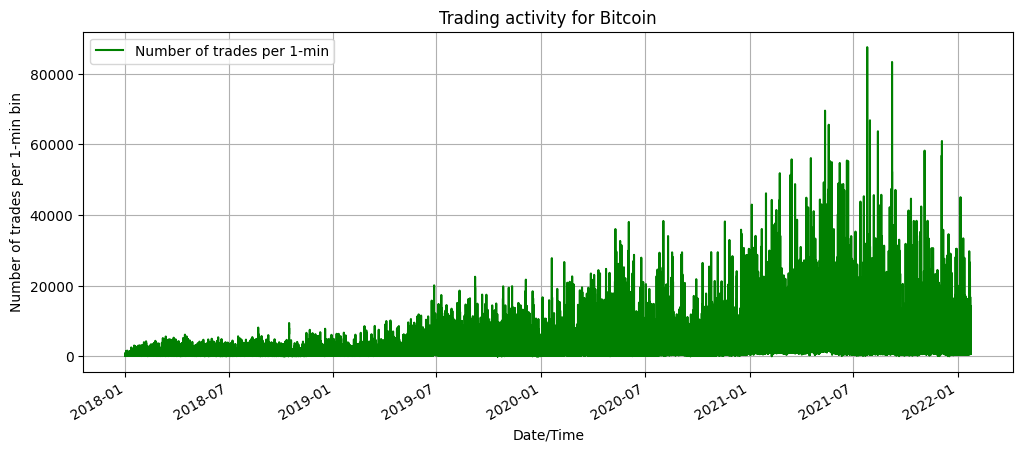

In [6]:
# Plotting trading activity
_ = df_dict[Utils.get_asset_id("Bitcoin")][Utils.TRADING_ACTIVITY].plot(color="green")
_ = plt.grid()
_ = plt.title("Trading activity for Bitcoin")
_ = plt.legend(["Number of trades per 1-min"])
_ = plt.xlabel("Date/Time")
_ = plt.ylabel("Number of trades per 1-min bin")

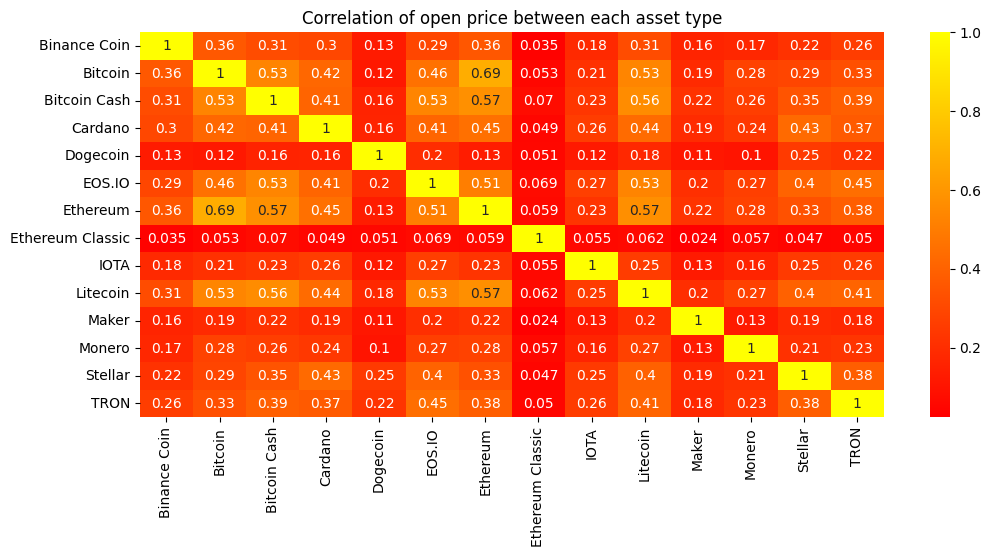

In [7]:
# Computing the correlation matrix of a given metric
X = pd.concat([df_dict[k]["Volume"] for k in Utils.ASSET_IDS], axis=1)
X.columns = Utils.ASSET_NAMES

# Plot this correlation matrix
_ = sns.heatmap(X.corr(), annot=True, cmap="autumn")
_ = plt.title("Correlation of open price between each asset type")

**Comments**
- TODO comments on BTC + ETH

In [90]:
df_ = df_dict[Utils.get_asset_id("Bitcoin")][Utils.OHLCV].iloc[-400:]

In [91]:
# Plot candlestick representation
from plotly.subplots import make_subplots

# Create subplots and mention plot grid size
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1, subplot_titles=('OHLC', 'Volume'), 
               row_width=[0.2, 0.7])


fig.append_trace(
    go.Candlestick(
        x=df_.index, 
        open=df_['Open'], 
        high=df_['High'],
        low=df_['Low'],
        close=df_['Close']), row=1, col=1)


fig.append_trace(go.Bar(x=df_.index, y=df_['Volume'], showlegend=False), row=2, col=1)


# Updating plotting options
fig.update_layout(title_text='Candlestick visualization for BTC')
fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()